In [613]:
import pandas as pd
import numpy as np

In [614]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [615]:
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS

In [616]:
train = pd.read_csv('./Fina_Train-2.csv')

In [617]:
test = pd.read_csv('./Fina_Test-2.csv')

In [618]:
y = train['TARGET(PRICE_IN_LACS)']
x = train.drop(['TARGET(PRICE_IN_LACS)','ADDRESS','CITY','BHK_OR_RK','READY_TO_MOVE','RESALE','ZONE'],axis=1)


In [619]:
test['IN_CITY'].value_counts()

Zirakpur                                               1176
Raj Nagar Extension                                     516
Whitefield                                              447
Thane West                                              430
Mulund (West)                                           354
Kolshet Road                                            354
Ghodbunder Road                                         352
Rajarhat                                                347
New Town                                                333
Sector-137 Noida                                        331
Hiranandani Estate                                      326
Kharghar                                                316
Kandivali (East)                                        299
Jagatpura                                               281
Kanjur Marg (East)                                      278
Mira Road                                               259
Noida Extension                         

In [620]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [621]:
total_col = ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'CITY', 'CITY_2']

In [622]:
cat_col = ['POSTED_BY','CITY_2','IN_CITY']

In [623]:
#encoder = OneHotEncoder()
#encoded_cat = encoder.fit_transform(x[cat_col])

In [624]:
#col_name = encoder.get_feature_names(cat_col)


In [625]:
#temp =pd.DataFrame(data=encoded_cat.toarray(),columns=col_name)

In [626]:
bhk_or_rak = {'BHK':1,
             'RK':0}
posted_by = {'Dealer':0,'Owner':1,'Builder':2}

In [627]:
#x['BHK_OR_RK'] = x['BHK_OR_RK'].replace(bhk_or_rak)
x['POSTED_BY'] = x['POSTED_BY'].replace(posted_by)

In [628]:
#final_x = x.merge(temp,on=x.index).copy()

In [629]:
#final_x = final_x.drop(['key_0','POSTED_BY','CITY_2','UNDER_CONSTRUCTION','POSTED_BY_Builder','CITY_2_Agra'],axis=1)

In [630]:
#final_x.columns

In [631]:
#in_city_encode.fit_transform(['IN_CITY','asds 12 '])

In [632]:
'''test_city = test['CITY'].value_counts()[test['CITY'].value_counts() > 10]
train_city = train['CITY'].value_counts()[train['CITY'].value_counts() > 10]'''

"test_city = test['CITY'].value_counts()[test['CITY'].value_counts() > 10]\ntrain_city = train['CITY'].value_counts()[train['CITY'].value_counts() > 10]"

In [633]:
'''test_in_city = test['IN_CITY'].value_counts()[test['IN_CITY'].value_counts() > 10]
train_in_city = train['IN_CITY'].value_counts()[train['IN_CITY'].value_counts() > 10]'''

"test_in_city = test['IN_CITY'].value_counts()[test['IN_CITY'].value_counts() > 10]\ntrain_in_city = train['IN_CITY'].value_counts()[train['IN_CITY'].value_counts() > 10]"

In [634]:
#train['CITY_2'].value_counts()

In [635]:
#list(set(x['CITY_2']) | set(test['CITY_2']))

In [636]:
city_encode = LabelEncoder()
city_encode.fit(list(set(x['CITY_2']) | set(test['CITY_2'])))
in_city_encode = LabelEncoder()
in_city_encode.fit(list(set(x['IN_CITY']) | set(test['IN_CITY'])))
x['CITY_2'] = city_encode.transform(x['CITY_2'] )
x['IN_CITY'] = in_city_encode.transform(x['IN_CITY'].astype(str))

In [637]:
#x['CITY_2'].value_counts()

#### some feature engineering

In [638]:
#x['SQ_PER_ROOM'] = x['SQUARE_FT']/x['BHK_NO.']
#x['LOCATION'] = x['LATITUDE'] + x['LONGITUDE']
#x['ONE_CITY'] = x['IN_CITY'] + x['CITY_2']

In [639]:
#final_x = x.drop(['LATITUDE','LONGITUDE'],axis=1)
final_x = x.copy()

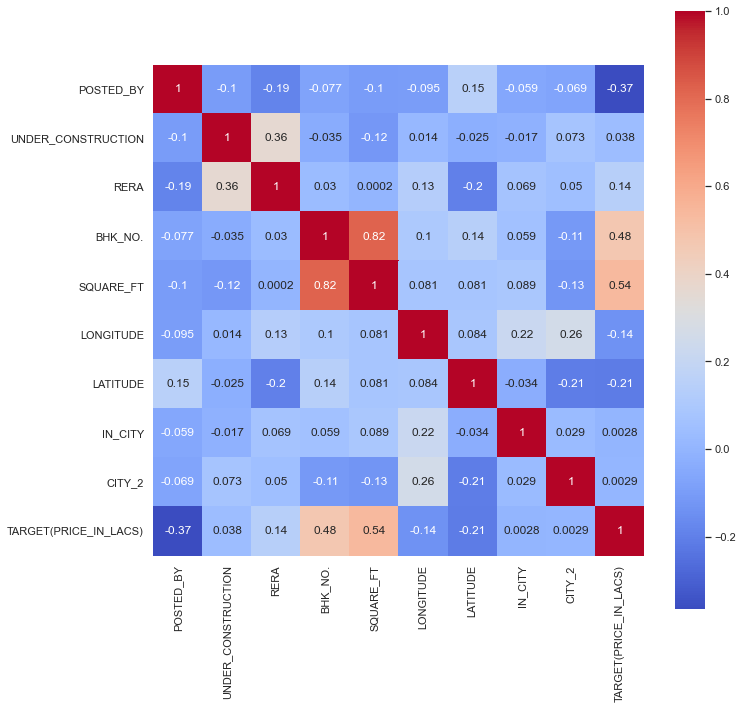

In [640]:
plt.figure(figsize=(11,11))
sns.heatmap(final_x.merge(y,on=x.index).drop(['key_0'],axis=1).corr(),cmap='coolwarm',annot=True,square=True)

In [641]:
#train.groupby(['CITY_2','IN_CITY']).describe()

In [642]:
x.shape

(26738, 9)

## Split

In [643]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [644]:
'''scaler = StandardScaler().fit(final_x)
final_x = scaler.transform(final_x)'''

'scaler = StandardScaler().fit(final_x)\nfinal_x = scaler.transform(final_x)'

In [645]:
x_train,x_test,y_train,y_test = train_test_split(final_x,y,train_size=0.7,random_state=37)

x_test,x_valid,y_test,y_valid = train_test_split(x_test,y_test,train_size=0.5,random_state=37)

In [646]:
x_train.shape,x_test.shape,x_valid.shape

((18716, 9), (4011, 9), (4011, 9))

In [647]:
from sklearn.metrics import mean_squared_log_error

### XGBoost

In [648]:
from xgboost import XGBRegressor,plot_importance,plot_tree

In [649]:
'''reg = XGBRegressor(n_estimators=2000,objective='reg:squaredlogerror',verbosity=1,tree_method='exact',n_jobs=-1)
score = reg.fit(final_x,y)
pred = score.predict(final_x)
train_acc = 100-mean_squared_log_error(np.exp(y),np.exp(pred))*100
#test_acc = 100-mean_squared_log_error(np.exp(y_test),np.exp(score.predict(x_test)))*100
print('Train',train_acc)
#print('Test',test_acc)
'''

"reg = XGBRegressor(n_estimators=2000,objective='reg:squaredlogerror',verbosity=1,tree_method='exact',n_jobs=-1)\nscore = reg.fit(final_x,y)\npred = score.predict(final_x)\ntrain_acc = 100-mean_squared_log_error(np.exp(y),np.exp(pred))*100\n#test_acc = 100-mean_squared_log_error(np.exp(y_test),np.exp(score.predict(x_test)))*100\nprint('Train',train_acc)\n#print('Test',test_acc)\n"

In [650]:
x_train.shape

(18716, 9)

In [651]:
max_depth = [ 6,7,8,9,]
eta = [0.2,0.3,0.4]
early_stopping_rounds = 20

In [652]:
#reg = XGBRegressor(objective='reg:squaredlogerror' ,n_jobs=-1,n_estimators=500,verbosity=1,eta=0.4,gamma=0.001,max_depth= 6, min_child_weight= 1)
eval_set = [(x_train, y_train),(x_test, y_test),(x_valid,y_valid) ]
reg = XGBRegressor(objective='reg:squaredlogerror' ,n_jobs=-1,n_estimators=1000,eta=0.3,max_depth=9,gamma=0.00001)

score = reg.fit(x_train,y_train,verbose=True,eval_metric=['rmsle'],eval_set=eval_set,early_stopping_rounds=40)
pred = score.predict(x_train)
train_acc = 100-mean_squared_log_error(np.exp(y_train),np.exp(pred))*100
test_acc = 100-mean_squared_log_error(np.exp(y_test),np.exp(score.predict(x_test)))*100

print('Train',train_acc)
print('Test',test_acc)


[0]	validation_0-rmsle:1.08371	validation_1-rmsle:1.08672	validation_2-rmsle:1.08633
Multiple eval metrics have been passed: 'validation_2-rmsle' will be used for early stopping.

Will train until validation_2-rmsle hasn't improved in 40 rounds.
[1]	validation_0-rmsle:0.94041	validation_1-rmsle:0.94339	validation_2-rmsle:0.94305
[2]	validation_0-rmsle:0.80669	validation_1-rmsle:0.80962	validation_2-rmsle:0.80934
[3]	validation_0-rmsle:0.68345	validation_1-rmsle:0.68631	validation_2-rmsle:0.68610
[4]	validation_0-rmsle:0.57152	validation_1-rmsle:0.57432	validation_2-rmsle:0.57416
[5]	validation_0-rmsle:0.47164	validation_1-rmsle:0.47436	validation_2-rmsle:0.47419
[6]	validation_0-rmsle:0.38430	validation_1-rmsle:0.38683	validation_2-rmsle:0.38650
[7]	validation_0-rmsle:0.30979	validation_1-rmsle:0.31210	validation_2-rmsle:0.31164
[8]	validation_0-rmsle:0.24764	validation_1-rmsle:0.24963	validation_2-rmsle:0.24910
[9]	validation_0-rmsle:0.19738	validation_1-rmsle:0.19903	validation_2-rms

[94]	validation_0-rmsle:0.04304	validation_1-rmsle:0.05250	validation_2-rmsle:0.05125
[95]	validation_0-rmsle:0.04295	validation_1-rmsle:0.05248	validation_2-rmsle:0.05122
[96]	validation_0-rmsle:0.04291	validation_1-rmsle:0.05248	validation_2-rmsle:0.05121
[97]	validation_0-rmsle:0.04279	validation_1-rmsle:0.05244	validation_2-rmsle:0.05117
[98]	validation_0-rmsle:0.04273	validation_1-rmsle:0.05241	validation_2-rmsle:0.05116
[99]	validation_0-rmsle:0.04261	validation_1-rmsle:0.05241	validation_2-rmsle:0.05117
[100]	validation_0-rmsle:0.04256	validation_1-rmsle:0.05239	validation_2-rmsle:0.05117
[101]	validation_0-rmsle:0.04250	validation_1-rmsle:0.05238	validation_2-rmsle:0.05118
[102]	validation_0-rmsle:0.04236	validation_1-rmsle:0.05231	validation_2-rmsle:0.05112
[103]	validation_0-rmsle:0.04228	validation_1-rmsle:0.05233	validation_2-rmsle:0.05111
[104]	validation_0-rmsle:0.04220	validation_1-rmsle:0.05230	validation_2-rmsle:0.05106
[105]	validation_0-rmsle:0.04217	validation_1-rms

[189]	validation_0-rmsle:0.03706	validation_1-rmsle:0.05123	validation_2-rmsle:0.05014
[190]	validation_0-rmsle:0.03701	validation_1-rmsle:0.05121	validation_2-rmsle:0.05014
[191]	validation_0-rmsle:0.03695	validation_1-rmsle:0.05120	validation_2-rmsle:0.05014
[192]	validation_0-rmsle:0.03691	validation_1-rmsle:0.05121	validation_2-rmsle:0.05015
[193]	validation_0-rmsle:0.03685	validation_1-rmsle:0.05119	validation_2-rmsle:0.05013
[194]	validation_0-rmsle:0.03683	validation_1-rmsle:0.05118	validation_2-rmsle:0.05012
[195]	validation_0-rmsle:0.03675	validation_1-rmsle:0.05113	validation_2-rmsle:0.05008
[196]	validation_0-rmsle:0.03670	validation_1-rmsle:0.05113	validation_2-rmsle:0.05008
[197]	validation_0-rmsle:0.03668	validation_1-rmsle:0.05113	validation_2-rmsle:0.05008
[198]	validation_0-rmsle:0.03663	validation_1-rmsle:0.05113	validation_2-rmsle:0.05006
[199]	validation_0-rmsle:0.03655	validation_1-rmsle:0.05112	validation_2-rmsle:0.05006
[200]	validation_0-rmsle:0.03652	validation

[284]	validation_0-rmsle:0.03361	validation_1-rmsle:0.05084	validation_2-rmsle:0.04968
[285]	validation_0-rmsle:0.03358	validation_1-rmsle:0.05085	validation_2-rmsle:0.04968
[286]	validation_0-rmsle:0.03356	validation_1-rmsle:0.05085	validation_2-rmsle:0.04969
[287]	validation_0-rmsle:0.03354	validation_1-rmsle:0.05086	validation_2-rmsle:0.04968
[288]	validation_0-rmsle:0.03353	validation_1-rmsle:0.05086	validation_2-rmsle:0.04968
[289]	validation_0-rmsle:0.03352	validation_1-rmsle:0.05085	validation_2-rmsle:0.04968
[290]	validation_0-rmsle:0.03352	validation_1-rmsle:0.05085	validation_2-rmsle:0.04968
[291]	validation_0-rmsle:0.03352	validation_1-rmsle:0.05085	validation_2-rmsle:0.04968
[292]	validation_0-rmsle:0.03351	validation_1-rmsle:0.05085	validation_2-rmsle:0.04967
[293]	validation_0-rmsle:0.03347	validation_1-rmsle:0.05084	validation_2-rmsle:0.04967
[294]	validation_0-rmsle:0.03344	validation_1-rmsle:0.05084	validation_2-rmsle:0.04967
[295]	validation_0-rmsle:0.03338	validation

[379]	validation_0-rmsle:0.03095	validation_1-rmsle:0.05057	validation_2-rmsle:0.04950
[380]	validation_0-rmsle:0.03090	validation_1-rmsle:0.05058	validation_2-rmsle:0.04950
[381]	validation_0-rmsle:0.03088	validation_1-rmsle:0.05058	validation_2-rmsle:0.04951
[382]	validation_0-rmsle:0.03087	validation_1-rmsle:0.05057	validation_2-rmsle:0.04952
[383]	validation_0-rmsle:0.03084	validation_1-rmsle:0.05056	validation_2-rmsle:0.04952
[384]	validation_0-rmsle:0.03083	validation_1-rmsle:0.05056	validation_2-rmsle:0.04952
[385]	validation_0-rmsle:0.03079	validation_1-rmsle:0.05056	validation_2-rmsle:0.04950
[386]	validation_0-rmsle:0.03078	validation_1-rmsle:0.05057	validation_2-rmsle:0.04950
[387]	validation_0-rmsle:0.03073	validation_1-rmsle:0.05056	validation_2-rmsle:0.04947
[388]	validation_0-rmsle:0.03070	validation_1-rmsle:0.05057	validation_2-rmsle:0.04948
[389]	validation_0-rmsle:0.03066	validation_1-rmsle:0.05055	validation_2-rmsle:0.04949
[390]	validation_0-rmsle:0.03064	validation


validation_0-rmsle:0.02974	validation_1-rmsle:0.05053	validation_2-rmsle:0.04940

reg = XGBRegressor(objective='reg:squaredlogerror' ,n_jobs=-1,n_estimators=1000,eta=0.3,max_depth=9,gamma=0.00001)

score = reg.fit(x_train,y_train,verbose=True,eval_metric=['rmsle'],eval_set=eval_set,early_stopping_rounds=20)


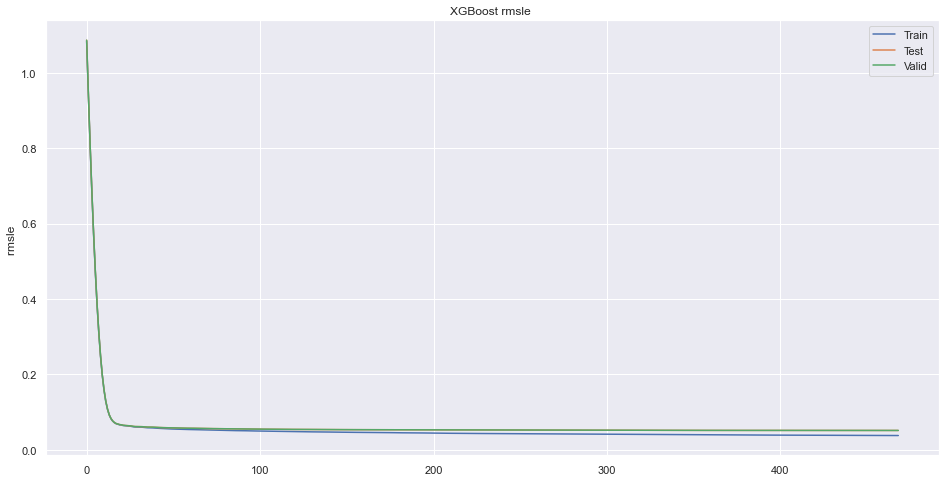

In [510]:
results = reg.evals_result()
epochs = len(results['validation_0']['rmsle'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x_axis, results['validation_0']['rmsle'], label='Train')
ax.plot(x_axis, results['validation_1']['rmsle'], label='Test')
ax.plot(x_axis, results['validation_1']['rmsle'], label='Valid')

ax.legend()
plt.ylabel('rmsle ')
plt.title('XGBoost rmsle ')
plt.show()

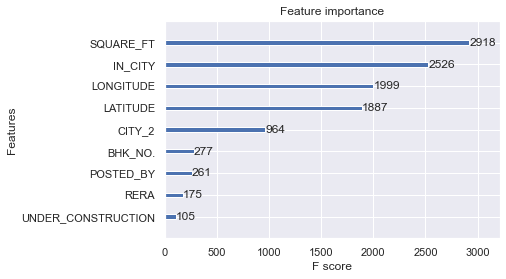

In [511]:
#fig,ax = plt.subplots(figsize=(12,12))
plot_importance(reg)

In [ ]:
from sklearn.svm import SVR

In [ ]:
reg = SVR(verbose=True,kernel='linear')
score = reg.fit(x_train,y_train)
pred = score.predict(temp)
train_acc = 100-mean_squared_log_error(np.exp(y_train),np.exp(pred))*100
test_acc = 100-mean_squared_log_error(np.exp(y_test),np.exp(score.predict(x_test)))*100
print('Train',train_acc)
print('Test',test_acc)


[LibSVM]

## Cross Validation

In [ ]:
from sklearn.model_selection import KFold,cross_validate

In [ ]:
scv = KFold(n_splits=5,shuffle=True,random_state=37)

In [ ]:
score = cross_validate(reg,final_x,y,scoring='neg_mean_squared_log_error',cv=scv,n_jobs=3,verbose=2)

In [ ]:
-1*score['test_score']

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(np.exp(y_train),np.exp(pred),alpha=0.2)

## Prediction

In [653]:
test = pd.read_csv('./Fina_Test-2.csv')
test = test.drop(['ADDRESS','CITY','ZONE','BHK_OR_RK','READY_TO_MOVE','Unnamed: 0', 'RESALE'],axis=1)

In [654]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,LONGITUDE,LATITUDE,IN_CITY,CITY_2
0,Owner,0,0,1,6.301100,21.262000,4.291113,Kamrej,Surat
1,Dealer,1,1,2,6.684612,18.966114,4.292489,Panvel,Lalitpur
2,Dealer,0,0,2,7.136560,22.592200,4.482832,New Town,Kolkata
3,Dealer,0,0,3,7.244463,26.988300,4.325253,Kalwar Road,Jaipur
4,Owner,0,0,1,6.064896,22.700000,4.288677,Mai Mandir,Nadiad


In [655]:
#encoded_cat = encoder.transform(test[cat_col])

In [656]:
#temp =pd.DataFrame(data=encoded_cat.toarray(),columns=col_name)

In [657]:
pd.options.display.max_rows = None

In [658]:
'''import bisect
le_classes = l_encode.classes_.tolist()
bisect.insort_left(le_classes, 'unknown')
l_encode.classes_ = le_classes'''

"import bisect\nle_classes = l_encode.classes_.tolist()\nbisect.insort_left(le_classes, 'unknown')\nl_encode.classes_ = le_classes"

In [659]:
'''test[test['CITY_2'].map(lambda x: False if x  in city_encode.classes_ else True)]'''

"test[test['CITY_2'].map(lambda x: False if x  in city_encode.classes_ else True)]"

In [660]:
#test['CITY_2'] = test['CITY_2'].map(lambda x : 'unknown' if x not in l_encode.classes_ else x)

In [661]:
test.iloc[2274,-2] = 'Ravapar'

In [662]:
test['IN_CITY'].isna().sum()

0

In [663]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,LONGITUDE,LATITUDE,IN_CITY,CITY_2
0,Owner,0,0,1,6.301100,21.262000,4.291113,Kamrej,Surat
1,Dealer,1,1,2,6.684612,18.966114,4.292489,Panvel,Lalitpur
2,Dealer,0,0,2,7.136560,22.592200,4.482832,New Town,Kolkata
3,Dealer,0,0,3,7.244463,26.988300,4.325253,Kalwar Road,Jaipur
4,Owner,0,0,1,6.064896,22.700000,4.288677,Mai Mandir,Nadiad


In [664]:
test[(test.CITY_2 == 190)]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,LONGITUDE,LATITUDE,IN_CITY,CITY_2


In [665]:
#test['BHK_OR_RK'] = test['BHK_OR_RK'].replace(bhk_or_rak)
test['POSTED_BY'] = test['POSTED_BY'].replace(posted_by)
test['CITY_2'] = city_encode.transform(test['CITY_2'])
test['IN_CITY'] = in_city_encode.transform(test['IN_CITY'])

In [666]:
'''test['SQ_PER_ROOM'] = test['SQUARE_FT']/test['BHK_NO.']
test['LOCATION'] = test['LATITUDE'] + test['LONGITUDE']
test['ONE_CITY'] = test['IN_CITY'] + test['CITY_2']'''

"test['SQ_PER_ROOM'] = test['SQUARE_FT']/test['BHK_NO.']\ntest['LOCATION'] = test['LATITUDE'] + test['LONGITUDE']\ntest['ONE_CITY'] = test['IN_CITY'] + test['CITY_2']"

In [667]:
#final_test = test.drop(['BHK_NO.'],axis=1)
final_test = test.copy()

In [668]:
#final_test = test.merge(temp,on=test.index).copy()

In [669]:
#final_test = final_test.drop(['key_0','POSTED_BY','CITY_2','ZONE','UNDER_CONSTRUCTION','ZONE_0', 'ZONE_1', 'ZONE_2', 'ZONE_3',
     #  'ZONE_4', 'ZONE_5', 'ZONE_6', 'ZONE_7', 'ZONE_8','POSTED_BY_Builder','CITY_2_Agra'],axis=1)

In [670]:
final_test.shape

(68720, 9)

In [671]:
final_test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,LONGITUDE,LATITUDE,IN_CITY,CITY_2
0,1,0,0,1,6.301100,21.262000,4.291113,3846,129
1,0,1,1,2,6.684612,18.966114,4.292489,6389,78
2,0,0,0,2,7.136560,22.592200,4.482832,5981,75
3,0,0,0,3,7.244463,26.988300,4.325253,3786,56
4,1,0,0,1,6.064896,22.700000,4.288677,4865,93


In [672]:
final_test['TARGET(PRICE_IN_LACS)'] = np.exp(reg.predict(final_test))

In [673]:
final_test['TARGET(PRICE_IN_LACS)']

0         18.896893
1         72.598793
2         49.326633
3         25.322493
4         25.341246
5         30.557919
6         58.572918
7         31.817539
8         40.996704
9        187.664246
10       189.343750
11        75.574829
12        87.136917
13        54.901772
14        48.996010
15       110.719635
16        55.442795
17        12.962179
18        52.958881
19        74.275078
20        60.020805
21        62.121651
22        62.489010
23        65.421936
24        31.575819
25        24.465347
26        24.801535
27        17.628679
28        39.333683
29        39.059963
30        47.760197
31        52.822754
32        36.204937
33        78.286293
34        84.935379
35        32.554134
36        32.573204
37       270.277863
38       253.530426
39        24.281324
40        55.576969
41        25.254686
42        28.141745
43       116.024605
44       115.351715
45       174.348389
46        21.157614
47       233.838531
48        15.778325
49        21.575918


In [674]:
final_test['TARGET(PRICE_IN_LACS)'].to_csv('Submission 15.csv',index=False)

In [ ]:
!pip install graphviz

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'D:\\Downloads\\Chrome\\graphviz-2.44.1-win32\\Graphviz\\bin\\'

In [ ]:
from graphviz import Source

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(reg,num_trees=5,ax=ax)